<center>
<b>Joneil Negrite</b> <br>
March 25, 2020
</center>

# I. Preliminaries

Import of necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading and checking data

In [2]:
df_dem = pd.read_excel("Data.xlsx",sheet_name = "Soc_Dem")
df_prod = pd.read_excel("Data.xlsx",sheet_name = "Products_ActBalance")
df_flow = pd.read_excel("Data.xlsx",sheet_name = "Inflow_Outflow")
df_sales = pd.read_excel("Data.xlsx",sheet_name = "Sales_Revenues")

In [3]:
def chk_df(df):
    print(df.shape)
    print(df.iloc[:,1:].describe())
    return df.head()

def get_bounds(df,fact = 2.5758):
    df_o = df.copy()
    dft = pd.DataFrame({'d_ave':df.mean(),'d_std':df.std()})
    dft['lower'] = dft.d_ave - fact*dft.d_std
    dft['upper'] = dft.d_ave + fact*dft.d_std

    for i,x in dft.iterrows():
        temp = [x.lower if a<x.lower else a for a in df_o[i]]
        temp = [x.upper if a>x.upper else a for a in df_o[i]]
        df_o[i] = temp
    return df_o

In [4]:
chk_df(df_dem)

(1615, 4)
               Age       Tenure
count  1615.000000  1615.000000
mean     42.848916   101.339938
std      18.550529    64.917297
min       0.000000     0.000000
25%      29.000000    44.000000
50%      41.000000    97.000000
75%      57.000000   151.000000
max      97.000000   273.000000


,Client,Sex,Age,Tenure
0,909,M,21,27
1,1217,M,38,165
2,850,F,49,44
3,1473,M,54,34
4,1038,M,29,106


In [5]:
df_dem.Sex.unique()
#unknown sex in model

array(['M', 'F', nan], dtype=object)

In [6]:
df_dem[df_dem.Sex.isna()]
#only 3 items involved.

,Client,Sex,Age,Tenure
422,1363,NaN,38,8
1062,953,NaN,50,35
1494,843,NaN,36,151


In [7]:
chk_df(df_prod)

(1615, 13)
          Count_CA    Count_SA    Count_MF  Count_OVD  Count_CC    Count_CL  \
count  1615.000000  426.000000  306.000000      419.0     170.0  135.000000   
mean      1.078638    1.166667    4.676471        1.0       1.0    1.185185   
std       0.333035    0.468205    7.845009        0.0       0.0    0.520980   
min       1.000000    1.000000    1.000000        1.0       1.0    1.000000   
25%       1.000000    1.000000    1.000000        1.0       1.0    1.000000   
50%       1.000000    1.000000    2.000000        1.0       1.0    1.000000   
75%       1.000000    1.000000    5.000000        1.0       1.0    1.000000   
max       4.000000    5.000000   79.000000        1.0       1.0    5.000000   

           ActBal_CA      ActBal_SA      ActBal_MF   ActBal_OVD    ActBal_CC  \
count    1615.000000     426.000000     306.000000   419.000000   170.000000   
mean     2438.601941   15201.520284   20517.533479   126.449897   351.295420   
std      7072.777350   32365.183430  

,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
1,2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
2,3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
3,4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
4,5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN


In [8]:
chk_df(df_flow)

(1587, 15)
          VolumeCred  VolumeCred_CA  TransactionsCred  TransactionsCred_CA  \
count    1587.000000    1587.000000       1587.000000          1587.000000   
mean     1823.559572    1506.329113          5.541903             4.265280   
std      5864.792552    4661.535696          6.355383             4.944032   
min         0.000000       0.000000          0.000000             0.000000   
25%       252.923393     214.290893          2.000000             2.000000   
50%       655.867500     620.858214          3.000000             3.000000   
75%      1426.027143    1304.757143          6.000000             4.000000   
max    107703.804286   98717.675000         63.000000            48.000000   

           VolumeDeb  VolumeDeb_CA  VolumeDebCash_Card  \
count    1587.000000   1587.000000         1587.000000   
mean     1697.218658   1460.202903          257.937337   
std      5183.787844   4281.369956          757.734230   
min         0.000000      0.000000            0.000000

,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0


In [9]:
chk_df(df_sales)

(969, 7)
          Sale_MF     Sale_CC     Sale_CL  Revenue_MF  Revenue_CC  Revenue_CL
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000
mean     0.199174    0.249742    0.299278    1.925015    2.712827    3.604220
std      0.399586    0.433087    0.458178    9.943601   17.693433    7.743618
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
75%      0.000000    0.000000    1.000000    0.000000    0.000000    4.642857
max      1.000000    1.000000    1.000000  220.488214  407.962500  133.275357


,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1094,0,1,0,0.000000,5.138571,0.0000
1,1484,1,0,1,25.609107,0.000000,8.7225
2,20,0,1,0,0.000000,3.822500,0.0000
3,1193,0,0,0,0.000000,0.000000,0.0000
4,142,0,0,0,0.000000,0.000000,0.0000


<b>Observations</b>
<ol>
    <li>Minimum of Age is 0. We can check this out to determine the proper course of action</li>
    <li>A lot of <strong><tt>NaN</tt></strong> values in <tt>df_prod</tt></li>
    <li><strong><tt>df_flow</tt></strong> has fewer entries compared to the two previous data frames</li>
    <li>The field <strong><tt>Sex</tt></strong> is encoded as either M of F. However, there are some items wherein the value is unknown. Since there are more M than F in the dataset, we will assume ${Sex} = {M}$ for the missing values. Furthermore, we encode the values numerically as M = 1,  F = 0.
    <li>As mentioned in the prompt, <strong><tt>df_sales</tt></strong> only contains records for the training data set.</li>
    <li>Since the fields <strong><tt>Sale_MF, Sale_CC,</tt></strong> and <strong><tt>Sale_CL</tt></strong> in <strong><tt>df_sales</tt></strong> are binary, the mean value for each of these fields what fraction of the customers availed of that product.
</ol>

Concerns 1-4 are addressed below

In [10]:
#1
df_dem[df_dem.Age == 0]
#notice: only one record here

,Client,Sex,Age,Tenure
1233,158,M,0,152


In [11]:
#2
df_prod = df_prod.fillna(0)

#3
df_flow = pd.merge(df_dem[['Client']],df_flow,how = 'left').fillna(0)

#4
df_dem.Sex = [1 if x != 'F' else 0 for x in df_dem.Sex.fillna('M')]

In [12]:
#consolidation of data
col_rem = ('Count_','Transactions')
col_rem2 = ['VolumeDeb','VolumeDeb_CA','VolumeCred','VolumeCred_CA','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']

df_conso = pd.merge(df_dem,df_prod,how = 'left',left_on = 'Client',right_on = 'Client')
df_conso = pd.merge(df_conso,df_flow,how = 'left',left_on = 'Client',right_on = 'Client')
#dropping columns related to others
#df_conso = df_conso.drop(columns=[x for x in df_conso.columns if (x.startswith(col_rem))])
#df_conso = df_conso.drop(columns=col_rem2)

print(df_conso.isna().any(axis = 0)) #making sure no nan values
df_conso.head()

Client                          False
Sex                             False
Age                             False
Tenure                          False
Count_CA                        False
Count_SA                        False
Count_MF                        False
Count_OVD                       False
Count_CC                        False
Count_CL                        False
ActBal_CA                       False
ActBal_SA                       False
ActBal_MF                       False
ActBal_OVD                      False
ActBal_CC                       False
ActBal_CL                       False
VolumeCred                      False
VolumeCred_CA                   False
TransactionsCred                False
TransactionsCred_CA             False
VolumeDeb                       False
VolumeDeb_CA                    False
VolumeDebCash_Card              False
VolumeDebCashless_Card          False
VolumeDeb_PaymentOrder          False
TransactionsDeb                 False
Transactions

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,909,1,21,27,1,0.0,0.0,1.0,0.0,1.0,...,450.678571,448.892857,178.571429,0.0000,166.571429,8.0,7.0,1.0,0.0,4.0
1,1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,...,714.285714,714.285714,0.000000,0.0000,714.285714,1.0,1.0,0.0,0.0,1.0
2,850,0,49,44,1,0.0,0.0,0.0,0.0,0.0,...,1226.345357,1226.345357,0.000000,0.0000,121.928571,6.0,6.0,0.0,0.0,1.0
3,1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,...,3875.137857,3794.580714,357.142857,444.5975,2076.785714,48.0,38.0,1.0,26.0,11.0
4,1038,1,29,106,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
#modelling set
df_model = pd.merge(df_conso,df_sales,how = 'right',on = 'Client')
print(df_model.shape)
df_model.head()

(969, 36)


,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0.000000,0.000000,0.000000
1,850,0,49,44,1,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,1.0,0,1,0,0.000000,0.893929,0.000000
2,1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,...,38.0,1.0,26.0,11.0,1,0,0,4.929643,0.000000,0.000000
3,1038,1,29,106,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.000000,0.000000,0.000000
4,225,1,14,187,1,0.0,0.0,1.0,0.0,0.0,...,5.0,0.0,4.0,1.0,0,0,1,0.000000,0.000000,8.130714


In [14]:
#output set
df_output = df_conso[~df_conso.Client.isin(df_sales.Client)]
print(df_output.shape)
df_output.head()

(646, 30)


,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,909,1,21,27,1,0.0,0.0,1.0,0.0,1.0,...,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
6,699,1,37,175,1,0.0,4.0,1.0,0.0,0.0,...,661.483214,566.126071,89.285714,0.000000,216.892857,13.0,10.0,2.0,0.0,5.0
9,528,0,19,70,1,0.0,0.0,1.0,0.0,0.0,...,390.056429,390.056429,125.000000,70.842143,190.821429,10.0,10.0,4.0,3.0,2.0
10,1145,1,61,45,1,0.0,0.0,0.0,0.0,0.0,...,3.392857,3.392857,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
13,517,0,41,28,1,0.0,0.0,0.0,0.0,0.0,...,557.896429,557.896429,71.428571,224.146429,251.178571,17.0,17.0,2.0,10.0,3.0


At this stage, we have separated the records to be used for modelling and the records to be used for prediction

# II. Modelling

Import of Necessary Libraries

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #for predicting probability of availment
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #for predicting revenue
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from scipy import stats

<h2> Probability of Availment </h2>

In [16]:
#splitting the data into the features and output
XM = df_model.iloc[:,1:-6]
YM = df_model.iloc[:,-6:]

#splitting training and test
X_train, X_test, Y_train, Y_test = train_test_split(XM,YM,test_size = 0.2,random_state = 27,stratify = YM.iloc[:,:3])

X_train = get_bounds(X_train,2.5758)

In [17]:
#check distribution of target variables
Y_train.describe()

,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.200000,0.249032,0.299355,2.119841,2.269533,3.565206
std,0.400258,0.432732,0.458271,10.902797,12.739561,7.906968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,4.559643
max,1.000000,1.000000,1.000000,220.488214,213.292857,133.275357


In [18]:
Y_test.describe()

,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.195876,0.252577,0.298969,1.146716,4.483717,3.760074
std,0.397901,0.435615,0.458991,4.293700,30.254672,7.070446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.750000,1.000000,0.000000,0.053571,5.415714
max,1.000000,1.000000,1.000000,32.040179,407.962500,46.392857


Above comparison is to ensure similar distribution of availments per product type

Fitting of models below

In [19]:
class models_tree(object):
    
    def __init__(self,X,Y,lbl = ''):
        self.name = lbl
        self.X = X
        self.Y = Y
        self.X_mod = get_bounds(self.X,2.5758)
        self.model = RandomForestClassifier(max_depth = 10,n_estimators = 100, random_state = 47)
        self.model.fit(X,Y)

    def get_proba(self,X):
        self.probs = [x[1] for x in self.model.predict_proba(X)]
    
    def roc_auc(self,X,Y):
        self.get_proba(X)
        fpr, tpr, thresholds = metrics.roc_curve(Y, self.probs)
        roc_auc = metrics.auc(fpr, tpr)
        #print(roc_auc)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - ' + self.name)
        plt.legend(loc="lower right")
        plt.show()
    
    def get_predictors(self):
        temp = pd.DataFrame({'Columns':self.X.columns.tolist(),'Effect':self.model.feature_importances_.tolist()})
        return temp.sort_values(by ='Effect',ascending = False).reset_index(drop = True)

In [20]:
#saving models into list for easier usage
mod_tree= []
mod_codes = ['MF','CC','CL']
for i in range(3):
    mod_tree.append(models_tree(X_train,Y_train.iloc[:,i],mod_codes[i]))
print("Done")

Done


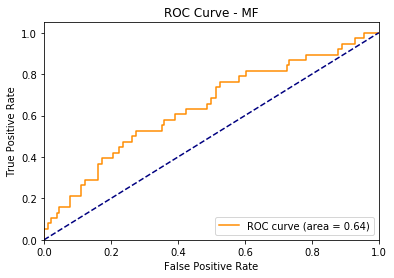

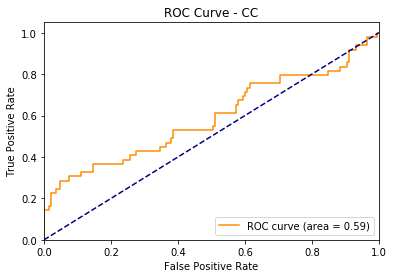

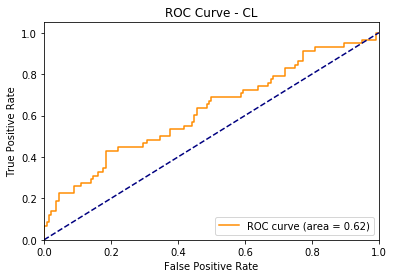

In [21]:
#validation via ROC curve
for i in range(3):
    mod_tree[i].roc_auc(X_test,Y_test.iloc[:,i])

In [22]:
for i in range(3):
    print('Predictors - ',mod_tree[i].name)
    tmp = mod_tree[i].get_predictors()
    print(tmp[tmp.Effect >= 0.05])
    print('')

Predictors -  MF
           Columns    Effect
0        ActBal_CA  0.070756
1    VolumeCred_CA  0.067987
2       VolumeCred  0.066075
3        VolumeDeb  0.064587
4     VolumeDeb_CA  0.059533
5              Age  0.057755
6           Tenure  0.055654
7  TransactionsDeb  0.051640

Predictors -  CC
                  Columns    Effect
0               ActBal_CA  0.104195
1               ActBal_SA  0.077921
2                  Tenure  0.064717
3              VolumeCred  0.060196
4  VolumeDeb_PaymentOrder  0.059094
5                     Age  0.057823
6               VolumeDeb  0.055941
7            VolumeDeb_CA  0.055070
8           VolumeCred_CA  0.054446

Predictors -  CL
         Columns    Effect
0         Tenure  0.128924
1            Age  0.106656
2      ActBal_CA  0.066418
3   VolumeDeb_CA  0.057373
4      VolumeDeb  0.053593
5  VolumeCred_CA  0.052415
6     VolumeCred  0.051071



# Expected Revenue

In [23]:
#preparing the data
X_rev = []
Y_rev = []
for i in range(3):
    X_rev.append(XM[YM.iloc[:,i]==1])
    Y_rev.append(pd.DataFrame(YM[YM.iloc[:,i]==1].iloc[:,3+i]))

In [24]:
X_rev[0].head()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
2,1,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,...,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
18,0,49,263,1,1.0,2.0,0.0,0.0,0.0,60.997857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
21,1,50,67,1,1.0,79.0,0.0,0.0,0.0,442.346071,...,701.987500,701.987500,89.285714,213.951786,397.142857,38.0,38.0,2.0,29.0,6.0
27,0,44,95,1,0.0,0.0,0.0,0.0,0.0,906.526071,...,185.392857,185.392857,28.571429,156.821429,0.000000,25.0,25.0,4.0,21.0,0.0
34,0,34,67,1,0.0,0.0,0.0,0.0,0.0,236.217857,...,341.830714,341.830714,257.142857,0.000000,82.187857,7.0,7.0,2.0,0.0,4.0


In [25]:
Y_rev[0].head()

,Revenue_MF
2,4.929643
18,0.238036
21,1.379821
27,10.363036
34,2.231964


In [26]:
#splitting the data
X_rev_train = []
X_rev_test = []
Y_rev_train = []
Y_rev_test = []
for i in range(3):
    x1,x2,y1,y2 = train_test_split(X_rev[i],Y_rev[i],test_size = 0.2,random_state = 27)
    X_rev_train.append(x1)
    X_rev_test.append(x2)
    Y_rev_train.append(y1)
    Y_rev_test.append(y2)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [28]:
class models_rev(object):
    
    def __init__(self,X,Y,mod_type,lbl = ''):
        self.name = lbl
        self.X = X
        self.Y = Y
        self.scaler = StandardScaler()
        self.scaler_y = StandardScaler()
        self.X_mod = get_bounds(self.X,2.5758)
        self.Y_mod = get_bounds(self.Y,2.5758)
        self.X_mod = self.scaler.fit_transform(self.X_mod)
        self.Y_mod = self.scaler_y.fit_transform(self.Y_mod)
        self.params = {'alpha':[1e-4,1e-3,1e-2,1e-1,1,5,10],
                       'max_iter':[10000]}
        self.model = GridSearchCV(mod_type,self.params,scoring = 'neg_mean_squared_error',cv=5,iid=False)
        self.model.fit(self.X_mod,self.Y_mod)
        
    def predict(self,X):
        X_temp = get_bounds(X,2.5758)
        return [x[0] for x in self.scaler_y.inverse_transform(self.model.predict(self.scaler.transform(X_temp)).tolist())]
    
    def score(self,X,Y):
        s1 = self.model.score(self.X_mod,self.Y)
        s2 = self.model.score(self.scaler.transform(get_bounds(X,2.5758)),Y)
        return(s1,s2)

    def fit(self,X,Y):
        Y_temp = self.predict(X)
        #print(Y_temp)
        
        self.comparison = pd.DataFrame({'Actual':Y.iloc[:,0],'Predicted':Y_temp})
        print('Number of observations:',len(Y))
        print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_temp))
        print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_temp))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_temp)))
        
    def plot_compare(self):
        plt.scatter(self.comparison.Actual,self.comparison.Predicted)
        plt.xlim([0.0, 50])
        plt.ylim([0.0, 50])
        plt.xlabel('Prediction')
        plt.ylabel('Actual Value')
        plt.title('Regression Scatter Plot - ' + self.name)
        plt.show()
        
    def get_coefs(self):
        temp = pd.DataFrame({'Columns':self.X.columns.tolist(),'Effect':self.model.best_estimator_.coef_[0]})
        temp['order'] = abs(temp.Effect)
        return temp.sort_values(by ='order',ascending = False).reset_index(drop = True)

In [29]:
mod_rev = []

for i in range(3):
    print("Fitting ",mod_codes[i])
    mod_rev.append(models_rev(X_rev_train[i],Y_rev_train[i],Ridge(),mod_codes[i]))
print("Done")

Fitting  MF


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Fitting  CC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Fitting  CL
Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
for i in range(3):
    print('Model parameters: ',i)
    print(mod_rev[i].model.best_params_)
    print(mod_rev[i].model.best_estimator_.coef_)
    mod_rev[i].fit(X_rev_test[i],Y_rev_test[i])
    print("")

Model parameters:  0
{'alpha': 10, 'max_iter': 10000}
[[ 0.05215023  0.13661351 -0.10482992 -0.013493    0.09213956 -0.05681543
   0.14945881  0.08281683 -0.17911909  0.13753046 -0.13638579  0.09008555
  -0.10678097 -0.10475506  0.17091132  0.0360731   0.12091906  0.05527857
  -0.0392699  -0.12172989  0.09187719  0.03849111 -0.07525893 -0.01016951
   0.07587512  0.00098312 -0.12243358  0.00694329 -0.14736815]]
Number of observations: 39
Mean Absolute Error: 9.998259628915326
Mean Squared Error: 215.93569755897553
Root Mean Squared Error: 14.694750680395211

Model parameters:  1
{'alpha': 10, 'max_iter': 10000}
[[-0.10811514  0.05297938  0.03086514 -0.06247499 -0.02808812  0.05704917
   0.18892695 -0.05793892 -0.00506104 -0.012958   -0.05371882 -0.00399789
  -0.08982866 -0.00548701 -0.04708125  0.09370477  0.26529371  0.06202005
  -0.22182533 -0.07748772 -0.18075939 -0.07425942 -0.11558942  0.1191548
   0.03516383  0.17550107  0.01107891 -0.06393446 -0.03752198]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Number of observations: 49
Mean Absolute Error: 9.354356610175078
Mean Squared Error: 257.67778224425035
Root Mean Squared Error: 16.052345069934496

Model parameters:  2
{'alpha': 10, 'max_iter': 10000}
[[-0.08077247  0.0591676  -0.03146343 -0.00846777 -0.05294919 -0.08608366
  -0.04175058 -0.13552571  0.04387563  0.11355521  0.13527712  0.11944006
   0.00360095  0.00622011  0.03924928  0.07451916 -0.17114331  0.07333739
  -0.10767647  0.07919738 -0.01998817  0.07352048 -0.00116132  0.04455035
   0.1245196  -0.04802765 -0.05966171 -0.09916937 -0.05782929]]
Number of observations: 58
Mean Absolute Error: 5.6854563221440495
Mean Squared Error: 63.90208006004911
Root Mean Squared Error: 7.993877661063441



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [31]:
mod_rev[0].get_coefs()

,Columns,Effect,order
0,Count_CL,-0.179119,0.179119
1,ActBal_CL,0.170911,0.170911
2,Count_OVD,0.149459,0.149459
3,TransactionsDeb_PaymentOrder,-0.147368,0.147368
4,ActBal_CA,0.137530,0.137530
5,Age,0.136614,0.136614
6,ActBal_SA,-0.136386,0.136386
7,TransactionsDebCash_Card,-0.122434,0.122434
8,VolumeDeb,-0.121730,0.121730
9,VolumeCred_CA,0.120919,0.120919


In [32]:
mod_rev[1].get_coefs()

,Columns,Effect,order
0,VolumeCred_CA,0.265294,0.265294
1,TransactionsCred_CA,-0.221825,0.221825
2,Count_OVD,0.188927,0.188927
3,VolumeDeb_CA,-0.180759,0.180759
4,TransactionsDeb_CA,0.175501,0.175501
5,VolumeDeb_PaymentOrder,0.119155,0.119155
6,VolumeDebCashless_Card,-0.115589,0.115589
7,Sex,-0.108115,0.108115
8,VolumeCred,0.093705,0.093705
9,ActBal_OVD,-0.089829,0.089829


In [33]:
mod_rev[2].get_coefs()

,Columns,Effect,order
0,VolumeCred_CA,-0.171143,0.171143
1,Count_CC,-0.135526,0.135526
2,ActBal_SA,0.135277,0.135277
3,TransactionsDeb,0.124520,0.124520
4,ActBal_MF,0.119440,0.119440
5,ActBal_CA,0.113555,0.113555
6,TransactionsCred_CA,-0.107676,0.107676
7,TransactionsDebCashless_Card,-0.099169,0.099169
8,Count_MF,-0.086084,0.086084
9,Sex,-0.080772,0.080772


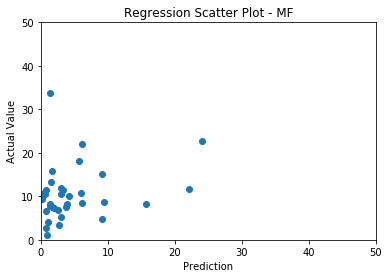

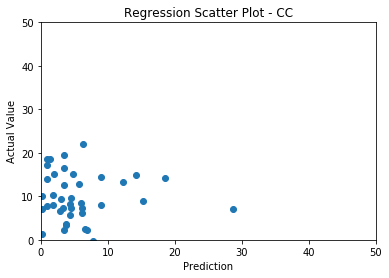

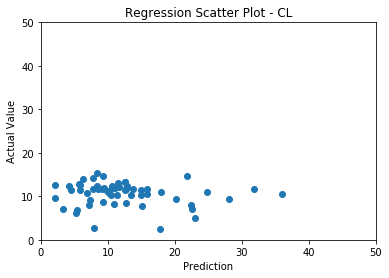

In [34]:
for i in range(3):
    mod_rev[i].plot_compare()

# Consolidated prediction

In [35]:
df_output.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,909,1,21,27,1,0.0,0.0,1.0,0.0,1.0,...,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
6,699,1,37,175,1,0.0,4.0,1.0,0.0,0.0,...,661.483214,566.126071,89.285714,0.000000,216.892857,13.0,10.0,2.0,0.0,5.0
9,528,0,19,70,1,0.0,0.0,1.0,0.0,0.0,...,390.056429,390.056429,125.000000,70.842143,190.821429,10.0,10.0,4.0,3.0,2.0
10,1145,1,61,45,1,0.0,0.0,0.0,0.0,0.0,...,3.392857,3.392857,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
13,517,0,41,28,1,0.0,0.0,0.0,0.0,0.0,...,557.896429,557.896429,71.428571,224.146429,251.178571,17.0,17.0,2.0,10.0,3.0


In [36]:
mod_tree[0].get_proba(df_output.iloc[:,1:])
mod_tree[1].get_proba(df_output.iloc[:,1:])
mod_tree[2].get_proba(df_output.iloc[:,1:])

dfy_output = pd.DataFrame({'prob_'+mod_codes[0]:mod_tree[0].probs,
                           'prob_'+mod_codes[1]:mod_tree[1].probs,
                           'prob_'+mod_codes[2]:mod_tree[2].probs})

for i in range(3):
    dfy_output['rev_'+mod_codes[i]] = mod_rev[i].predict(df_output.iloc[:,1:])

for i in range(3):
    dfy_output['exp_'+mod_codes[i]] = dfy_output.iloc[:,i] * dfy_output.iloc[:,3+i]

dfy_output['Client'] = df_output.Client.reset_index(drop = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [37]:
dfy_output.describe()

,prob_MF,prob_CC,prob_CL,rev_MF,rev_CC,rev_CL,exp_MF,exp_CC,exp_CL,Client
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,0.208891,0.250648,0.302526,8.922210,8.989910,11.778961,1.866278,2.259500,3.510795,797.828173
std,0.096950,0.121469,0.122600,6.499850,6.153471,2.439647,1.855308,2.124961,1.531223,469.198360
min,0.045111,0.046349,0.088038,-10.599307,-10.167848,3.591007,-3.265823,-3.668078,1.100133,3.000000
25%,0.141523,0.172148,0.210862,5.266536,5.452380,10.612171,0.875996,1.030116,2.382256,376.000000
50%,0.187218,0.220702,0.279753,8.677248,8.723614,11.693905,1.527116,1.804788,3.111070,795.000000
75%,0.255862,0.297116,0.385889,12.550334,11.959439,12.820219,2.500025,3.175372,4.337548,1200.750000
max,0.674353,0.830784,0.722608,38.961896,37.357707,25.326530,14.093270,15.996552,10.347734,1614.000000


In [38]:
#consolidation
lst_final = []
for i,x in dfy_output.iterrows():
    val = 0
    tp = ''
    client = x.Client
    
    if x.exp_MF > x.exp_CC:
        tp = 'MF'
        val = x.exp_MF
    else:
        tp = 'CC'
        val = x.exp_CC
    
    if x.exp_CL > val:
        tp = 'CL'
        val = x.exp_CL
    
    lst_final.append([int(client),tp,val])
df_final = pd.DataFrame(lst_final,columns = ['Client','Product','Rev']).sort_values(by = 'Rev',ascending = False).reset_index(drop = True)
pd.options.display.max_rows = 200
df_final.head(100)

,Client,Product,Rev
0,330,CC,15.996552
1,1510,CC,14.827973
2,1093,MF,14.093270
3,110,CC,14.002310
4,532,CC,13.388503
5,197,CC,12.905751
6,1129,MF,11.893093
7,766,MF,11.632381
8,340,CC,11.399530
9,411,MF,11.310470


In [39]:
df_final.iloc[:100,1:].groupby(['Product']).agg(['count','mean','sum'])

Rev                      
        count      mean         sum
Product                            
CC         26  8.924156  232.028062
CL         52  6.920532  359.867650
MF         22  7.974708  175.443575